In this dataset we have to predict the food price based on the other parameters,so here we will be using Linear Regression Alogirthm to predict the results.

In [1]:
#importing all the libraries and loading the csv file

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_excel('food.xlsx')  #reading the excel file 

In [5]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300


FEATURE ENGINEERING

In [6]:
df.drop('RESTAURANT_ID',axis=1,inplace=True)

In [7]:
df.shape

(1511, 8)

In [8]:
df.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE     1511 non-null   object 
 1   CUISINES  1511 non-null   object 
 2   TIME      1511 non-null   object 
 3   CITY      1494 non-null   object 
 4   LOCALITY  1496 non-null   object 
 5   RATING    1381 non-null   float64
 6   VOTES     1381 non-null   float64
 7   COST      1511 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 94.6+ KB


In [10]:
#visualizing null values through heatmap

In [11]:
#importing Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

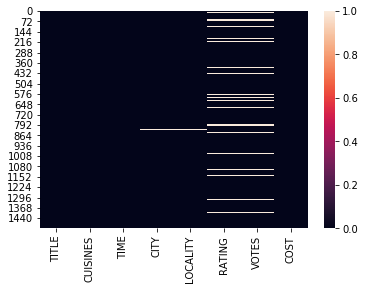

In [12]:
sns.heatmap(df.isna())

In [13]:
#filling empty spaces with 'none'

In [14]:
df['CITY'].fillna('none',inplace=True)

In [15]:
df['LOCALITY'].fillna('none',inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE     1511 non-null   object 
 1   CUISINES  1511 non-null   object 
 2   TIME      1511 non-null   object 
 3   CITY      1511 non-null   object 
 4   LOCALITY  1511 non-null   object 
 5   RATING    1381 non-null   float64
 6   VOTES     1381 non-null   float64
 7   COST      1511 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 94.6+ KB


In [17]:
from sklearn.impute import SimpleImputer

In [18]:
imp=SimpleImputer(strategy='most_frequent')

In [19]:
#filling the null values using simple imputer
a=['RATING','VOTES']
for i in a:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE     1511 non-null   object 
 1   CUISINES  1511 non-null   object 
 2   TIME      1511 non-null   object 
 3   CITY      1511 non-null   object 
 4   LOCALITY  1511 non-null   object 
 5   RATING    1511 non-null   float64
 6   VOTES     1511 non-null   float64
 7   COST      1511 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 94.6+ KB


In [21]:
df.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300


In [22]:
#seperating cusines in c1,c2,c3,c4,c5
df['C1'] = df['CUISINES'] .str.split(',').str[0]
df['C2'] = df['CUISINES'] .str.split(',').str[1]
df['C3'] = df['CUISINES'] .str.split(',').str[2]
df['C4'] = df['CUISINES'] .str.split(',').str[3]
df['C5'] = df['CUISINES'] .str.split(',').str[4]

In [23]:
df.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,C1,C2,C3,C4,C5
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200,Malwani,Goan,North Indian,NaN,NaN
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500,Asian,Modern Indian,Japanese,NaN,NaN
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800,North Indian,Chinese,Biryani,Hyderabadi,NaN
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800,Tibetan,Chinese,NaN,NaN,NaN
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300,Desserts,NaN,NaN,NaN,NaN


In [24]:
df.drop('CUISINES',axis=1,inplace=True)

In [25]:
df.head()

,TITLE,TIME,CITY,LOCALITY,RATING,VOTES,COST,C1,C2,C3,C4,C5
0,CASUAL DINING,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200,Malwani,Goan,North Indian,NaN,NaN
1,"CASUAL DINING,BAR",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500,Asian,Modern Indian,Japanese,NaN,NaN
2,CASUAL DINING,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800,North Indian,Chinese,Biryani,Hyderabadi,NaN
3,QUICK BITES,11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800,Tibetan,Chinese,NaN,NaN,NaN
4,DESSERT PARLOR,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300,Desserts,NaN,NaN,NaN,NaN


In [26]:
a=['C1','C2','C3','C4','C5']
for i in a:
    df[i]=df[i].fillna('none')

In [27]:
df.head()

,TITLE,TIME,CITY,LOCALITY,RATING,VOTES,COST,C1,C2,C3,C4,C5
0,CASUAL DINING,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200,Malwani,Goan,North Indian,none,none
1,"CASUAL DINING,BAR",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500,Asian,Modern Indian,Japanese,none,none
2,CASUAL DINING,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800,North Indian,Chinese,Biryani,Hyderabadi,none
3,QUICK BITES,11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800,Tibetan,Chinese,none,none,none
4,DESSERT PARLOR,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300,Desserts,none,none,none,none


In [28]:
#instead of dropping time column we can change it to num values using Label Encoder as below

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le=LabelEncoder()

In [31]:
a=['TITLE','TIME','CITY','LOCALITY','C1','C2','C3','C4','C5']

In [32]:
for i in a:
    df[i]=le.fit_transform(df[i])

In [33]:
df.head()

,TITLE,TIME,CITY,LOCALITY,RATING,VOTES,COST,C1,C2,C3,C4,C5
0,18,154,67,106,3.6,49.0,1200,38,26,46,55,38
1,20,398,17,396,4.2,30.0,1500,3,46,29,55,38
2,18,139,17,417,3.8,221.0,800,47,17,8,24,38
3,55,61,51,40,4.1,24.0,800,64,17,64,55,38
4,29,128,51,257,3.8,165.0,300,18,67,64,55,38


In [34]:
df.describe()

,TITLE,TIME,CITY,LOCALITY,RATING,VOTES,COST,C1,C2,C3,C4,C5
count,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000
mean,34.285903,247.284580,33.274653,253.108537,3.808868,377.025149,647.597617,30.876241,39.598279,47.007942,49.058901,36.252813
std,19.210760,156.920572,17.745497,158.988163,0.401653,758.917289,664.383686,18.700424,21.771802,22.153975,13.693469,6.579188
min,0.000000,0.000000,0.000000,0.000000,2.300000,4.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,116.000000,17.000000,127.500000,3.600000,40.000000,300.000000,15.000000,17.000000,28.000000,55.000000,38.000000
50%,31.000000,236.000000,32.000000,231.000000,3.900000,133.000000,500.000000,29.000000,47.000000,64.000000,55.000000,38.000000
75%,55.000000,389.500000,51.000000,383.000000,4.000000,398.500000,750.000000,47.000000,59.000000,64.000000,55.000000,38.000000
max,66.000000,555.000000,70.000000,551.000000,4.900000,13500.000000,14000.000000,67.000000,67.000000,64.000000,55.000000,38.000000


From the above we can see that outliers is present in many columns, which is nothing but the unexpected value that we can see here that how the max values deviate from the 3rd quartile value.

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE     1511 non-null   int32  
 1   TIME      1511 non-null   int32  
 2   CITY      1511 non-null   int32  
 3   LOCALITY  1511 non-null   int32  
 4   RATING    1511 non-null   float64
 5   VOTES     1511 non-null   float64
 6   COST      1511 non-null   int64  
 7   C1        1511 non-null   int32  
 8   C2        1511 non-null   int32  
 9   C3        1511 non-null   int32  
 10  C4        1511 non-null   int32  
 11  C5        1511 non-null   int32  
dtypes: float64(2), int32(9), int64(1)
memory usage: 88.7 KB


In [226]:
#so finally we have each column in int and float dtype so will go ahead and perform data visualisation

DATA VISUALISATION

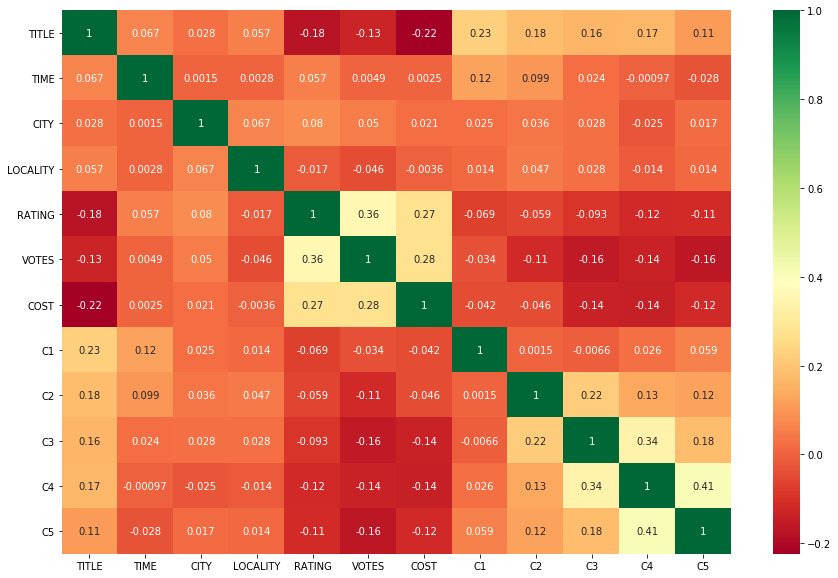

In [227]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

In [228]:
#so from the above we can see that most of the values are correlated amongst each other

<BarContainer object of 1511 artists>

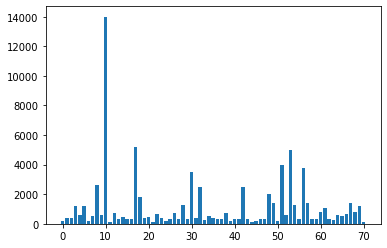

In [229]:
plt.bar(df['CITY'],df['COST'])  #plotting the cost against different cities

In [230]:
#plotting the cost against differnt cuisines

<BarContainer object of 1511 artists>

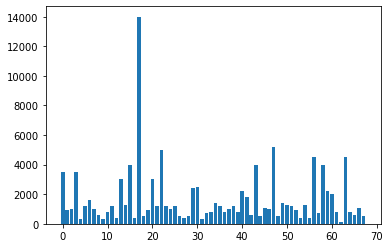

In [231]:
plt.bar(df['C1'],df['COST'])

<BarContainer object of 1511 artists>

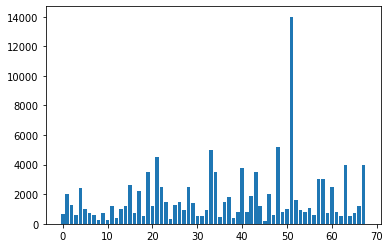

In [232]:
plt.bar(df['C2'],df['COST'])

<BarContainer object of 1511 artists>

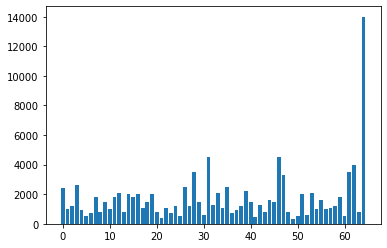

In [233]:
plt.bar(df['C3'],df['COST'])

<BarContainer object of 1511 artists>

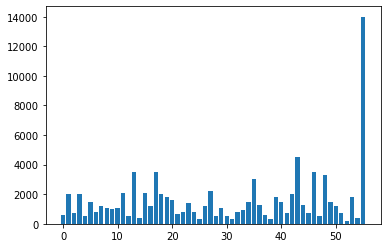

In [234]:
plt.bar(df['C4'],df['COST'])

<BarContainer object of 1511 artists>

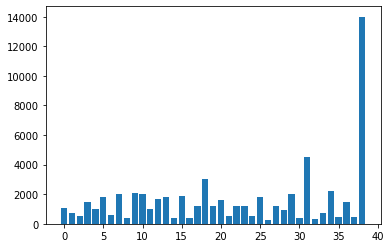

In [235]:
plt.bar(df['C5'],df['COST'])

In [236]:
#plotting histogram for each column

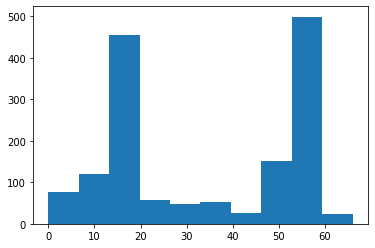

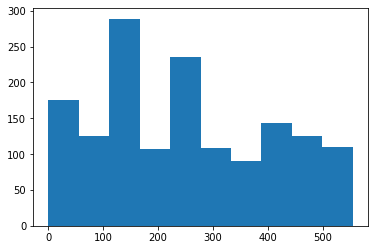

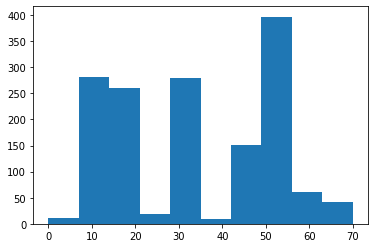

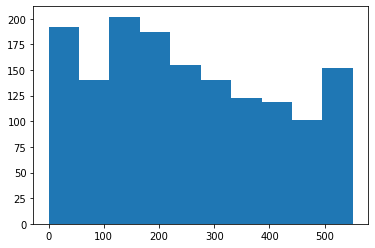

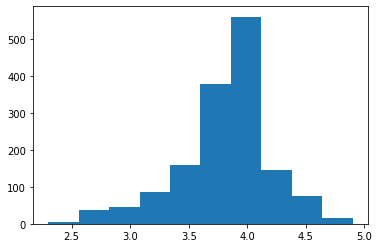

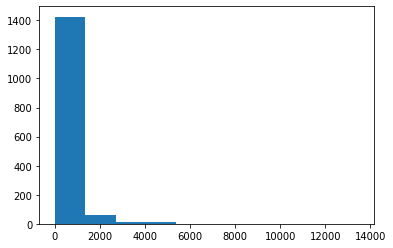

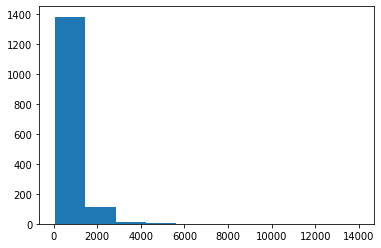

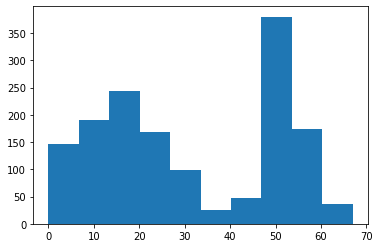

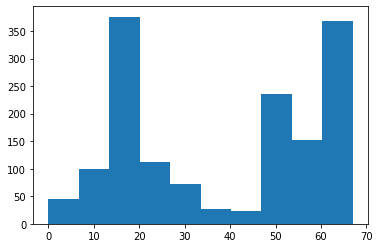

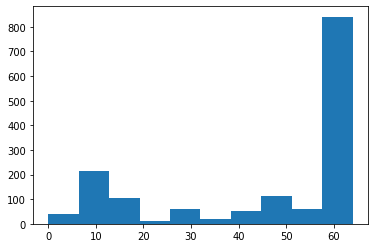

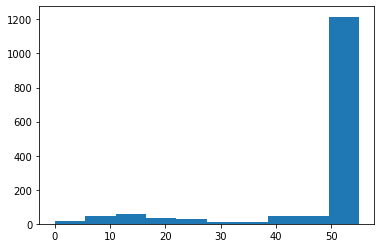

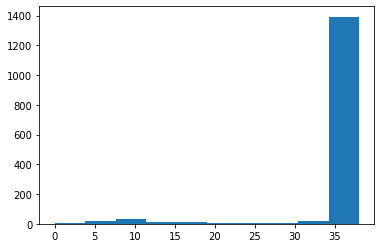

In [237]:
for i in df.columns:
    plt.figure()
    plt.hist(df[i])

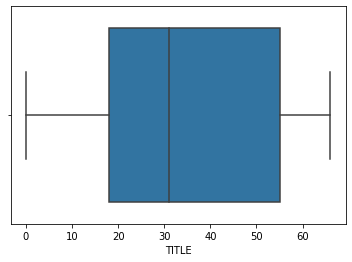

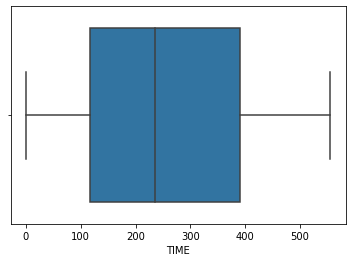

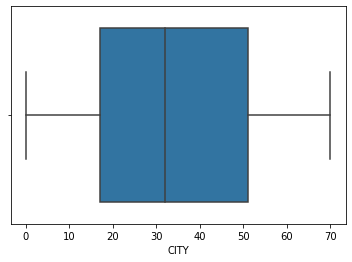

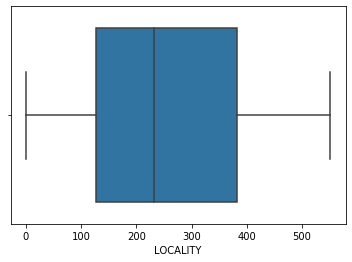

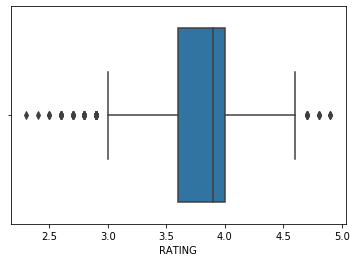

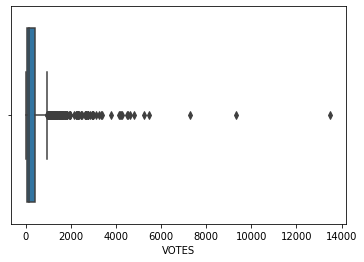

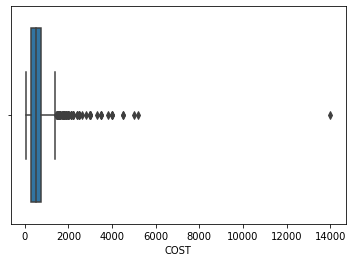

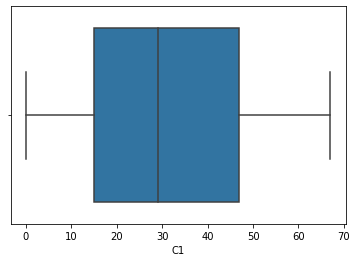

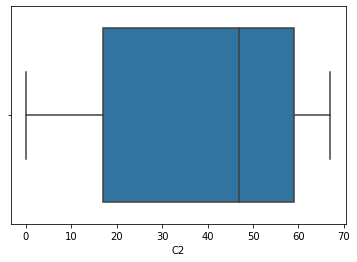

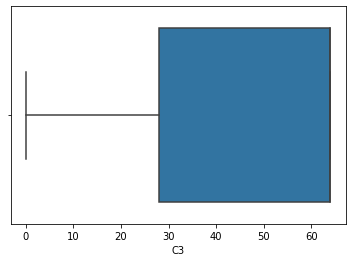

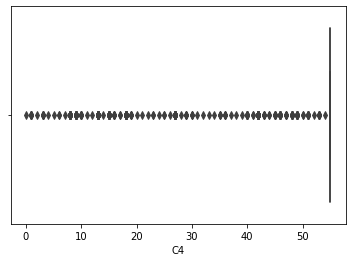

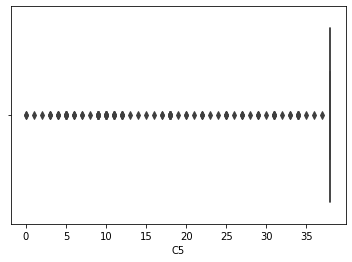

In [238]:
for i in df.columns:
    plt.figure()
    sns.boxplot(df[i])    #checking the outliers through boxplot

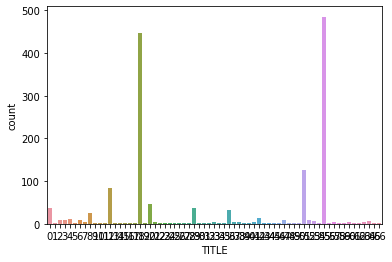

In [239]:
sns.countplot(df['TITLE'])

In [240]:
#removing the outliers

In [241]:
from scipy.stats import zscore

In [242]:
z=np.abs(zscore(df))

In [243]:
threshold=3
print(np.where(z>3))

(array([   6,   32,   35,   46,   84,   93,  118,  125,  128,  134,  159,
        162,  169,  170,  186,  196,  196,  208,  213,  265,  274,  281,
        290,  293,  295,  303,  304,  306,  308,  313,  318,  337,  343,
        344,  344,  354,  364,  379,  385,  391,  397,  411,  414,  422,
        431,  445,  447,  469,  472,  476,  496,  497,  502,  509,  510,
        545,  560,  563,  564,  599,  614,  622,  643,  643,  650,  655,
        656,  656,  672,  678,  684,  731,  744,  763,  775,  786,  789,
        796,  804,  811,  839,  849,  852,  855,  856,  863,  872,  872,
        885,  892,  894,  900,  901,  905,  909,  913,  922,  924,  931,
        966,  967,  973,  978,  996, 1003, 1003, 1007, 1007, 1008, 1016,
       1020, 1034, 1038, 1043, 1044, 1059, 1083, 1087, 1107, 1119, 1132,
       1133, 1139, 1146, 1147, 1151, 1157, 1167, 1176, 1190, 1193, 1206,
       1207, 1244, 1248, 1262, 1288, 1293, 1310, 1326, 1337, 1345, 1346,
       1373, 1395, 1404, 1427, 1463, 1467, 1469, 1

In [244]:
df_new=df[(z<3).all(axis=1)]

In [245]:
df_new.shape   #shape of the df after removing outliers

(1364, 12)

In [246]:
df.shape

(1511, 12)

In [247]:
#now we will use scaling technique to standardize the dataset

In [248]:
from sklearn.preprocessing import StandardScaler

In [249]:
std=StandardScaler()

In [250]:
df=std.fit_transform(df_new)
df=pd.DataFrame(data=df)

In [251]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.875812,-0.578739,1.917172,-0.938330,-0.538712,-0.574566,1.492341,0.372103,-0.648097,-0.094046,0.370340,0.15837
1,-0.772846,0.959291,-0.908108,0.887222,1.070346,-0.621195,2.199066,-1.493883,0.265366,-0.868730,0.370340,0.15837
2,-0.875812,-0.673290,-0.908108,1.019417,-0.002359,-0.152447,0.550043,0.851928,-1.059155,-1.825692,-2.283358,0.15837
3,1.029052,-1.164955,1.013082,-1.353800,0.802170,-0.635920,0.550043,1.758263,-1.059155,0.726208,0.370340,0.15837
4,-0.309501,-0.742628,1.013082,0.012216,-0.002359,-0.289881,-0.627831,-0.694175,1.224502,0.726208,0.370340,0.15837


In [252]:
df.skew()

0    -0.137584
1     0.304809
2     0.082569
3     0.247208
4    -0.530868
5     2.647054
6     1.856797
7     0.052345
8    -0.083942
9    -0.922934
10   -2.686885
11   -7.102828
dtype: float64

In [253]:
#splitting the dataset in x and y

In [254]:
x=df.drop(6,axis=1)

In [255]:
y=df[6].values
y=y.reshape(-1,1)

In [256]:
x.shape

(1364, 11)

In [257]:
y.shape

(1364, 1)

<Figure size 432x288 with 0 Axes>

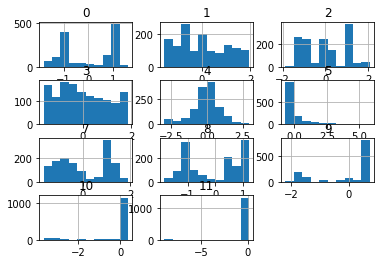

<Figure size 432x288 with 0 Axes>

In [258]:
x.hist()
plt.figure()

In [259]:
#now with the help of linear regression we will build our model and check the accuracy

In [260]:
#importing all required libraries

In [261]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [262]:
max_r2_scr=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.30)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,pred)
    print("the r2 score corrosponding to the random state",r_state,"is:",r2_scr)
    if r2_scr>max_r2_scr:
        max_r2_scr=r2_scr
        final_r_state=r_state

print()
print()
print("maximum r2 score for the random state",final_r_state,"is:",max_r2_scr)

the r2 score corrosponding to the random state 42 is: 0.27043315650075417
the r2 score corrosponding to the random state 43 is: 0.3193390845564309
the r2 score corrosponding to the random state 44 is: 0.2709258673567836
the r2 score corrosponding to the random state 45 is: 0.2539326746318016
the r2 score corrosponding to the random state 46 is: 0.23531608665000958
the r2 score corrosponding to the random state 47 is: 0.34804269155142475
the r2 score corrosponding to the random state 48 is: 0.29005317726962054
the r2 score corrosponding to the random state 49 is: 0.272594312454311
the r2 score corrosponding to the random state 50 is: 0.22945377863545813
the r2 score corrosponding to the random state 51 is: 0.33534785740933193
the r2 score corrosponding to the random state 52 is: 0.24710799072790268
the r2 score corrosponding to the random state 53 is: 0.2386963790433021
the r2 score corrosponding to the random state 54 is: 0.331654799471479
the r2 score corrosponding to the random state

In [263]:
lr.coef_

array([[-0.2572365 , -0.04187611,  0.00580117,  0.03475784,  0.11567223,
         0.32934903,  0.022449  ,  0.03272672, -0.10493406, -0.04083938,
        -0.02999225]])

In [264]:
lr.intercept_

array([-0.01062078])

In [265]:
from math import sqrt
print(sqrt(mean_absolute_error(y_test,pred)))   #rms error

0.7283743855952205


In [266]:
print(mean_absolute_error(y_test,pred))

0.530529245591215


In [267]:
#performing regularisation by finding the best hyper parameter

In [268]:
from sklearn.linear_model import Lasso,Ridge

In [269]:
from sklearn.model_selection import GridSearchCV

In [270]:
ls=Lasso()
rg=Ridge()

In [271]:
params={'alpha':[1.0,0.1,0.01,0.001]}

In [272]:
gd=GridSearchCV(estimator=ls,param_grid=params)
gd1=GridSearchCV(estimator=rg,param_grid=params)

In [273]:
gd.fit(x,y)
gd1.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1.0, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [274]:
gd.best_estimator_

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [275]:
gd1.best_estimator_

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [276]:
gd.best_params_

{'alpha': 0.01}

In [277]:
gd1.best_estimator_

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [278]:
gd.best_score_

0.2673804195697683

In [279]:
gd1.best_score_

0.2661692561760847

In [280]:
#trying to improve the score using cross validation

In [281]:
from sklearn.model_selection import cross_val_score

In [282]:
score=cross_val_score(lr,x,y,cv=5)
score

array([0.24465771, 0.22036556, 0.31640718, 0.29739058, 0.25182784])

In [283]:
#now we will check with other models whether score will improve 

In [287]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [288]:
model=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor()]

In [289]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=79,test_size=0.20)
for i in model:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i,"score",r2_score(y_test,pred))
    print(i,"abs error",mean_absolute_error(y_test,pred))
    print(i,"sq error",mean_squared_error(y_test,pred))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') score 0.3758699205170153
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') abs error 0.5121376453109714
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') sq error 0.5299332532341435
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) score 0.43091901575379177
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) abs error 0.4551486306248328
SVR(C=1.0, ca

In [290]:
#so from the above we can infer that we are getting the maximum r2 score through SVR

In [291]:
#using grid search cv to find the best hyper parameter for svr

In [292]:
params={'kernel':('rbf','poly','linear'),'C':[0,1,10]}

In [293]:
gd2=GridSearchCV(estimator=SVR(),param_grid=params)

In [294]:
gd2.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0, 1, 10], 'kernel': ('rbf', 'poly', 'linear')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [295]:
gd2.best_estimator_

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [296]:
gd2.best_params_

{'C': 1, 'kernel': 'rbf'}

In [297]:
gd2.best_score_

0.3191863187529015

In [298]:
#find r2 scores at different n_neighbors for KNN

In [299]:
for i in range(2,22):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    print("r2 score at neighbor",i,"is:",r2_score(y_test,pred))

r2 score at neighbor 2 is: 0.15713477903743556
r2 score at neighbor 3 is: 0.3334790773664005
r2 score at neighbor 4 is: 0.36178225262219565
r2 score at neighbor 5 is: 0.3758699205170153
r2 score at neighbor 6 is: 0.38472878472803895
r2 score at neighbor 7 is: 0.3772039263895779
r2 score at neighbor 8 is: 0.4063821724750357
r2 score at neighbor 9 is: 0.3810873283423357
r2 score at neighbor 10 is: 0.3805661350185561
r2 score at neighbor 11 is: 0.38654852644881055
r2 score at neighbor 12 is: 0.3731513821379314
r2 score at neighbor 13 is: 0.39034688456041944
r2 score at neighbor 14 is: 0.3941085313329953
r2 score at neighbor 15 is: 0.38710705142296287
r2 score at neighbor 16 is: 0.39091927145986616
r2 score at neighbor 17 is: 0.39583917656993806
r2 score at neighbor 18 is: 0.384731725671019
r2 score at neighbor 19 is: 0.3760279434736753
r2 score at neighbor 20 is: 0.3747418163177578
r2 score at neighbor 21 is: 0.36518941578141517


In [300]:
#so from knn we are getting a max of 41% accuracy score at n_neighbors=8

In [305]:
#now will try to boost the result through ensemble techniques

In [306]:
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor

In [307]:
model=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor()]

In [308]:
for i in model:
    a=AdaBoostRegressor(base_estimator=i,n_estimators=150,learning_rate=0.01)
    a.fit(x_train,y_train)
    predad=a.predict(x_test)
    print("r2 score for model",i,"is:",r2_score(y_test,predad))

r2 score for model KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') is: 0.3716312490571452
r2 score for model SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) is: 0.4648162212288036
r2 score for model DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') is: 0.6203477297054087


In [309]:
#so from the above we can conclude that we are getting the max result from base estimator as Decision tree AdaBoostRegressor

In [310]:
l=[0.1,0.01,1.0]
for i in l:
    gd=GradientBoostingRegressor(learning_rate=i)
    gd.fit(x_train,y_train)
    predgd=gd.predict(x_test)
    print("r2 score at lerning rate",i,"is:",r2_score(y_test,predgd))

r2 score at lerning rate 0.1 is: 0.6475827479311184
r2 score at lerning rate 0.01 is: 0.3581057476854478
r2 score at lerning rate 1.0 is: 0.1246567342470869


In [311]:
#from above we are getting a max of 64% accuracy from gd boost reg

In [314]:
a=[150,200,250,300,350]
for i in a:
    rd=RandomForestRegressor(n_estimators=i)
    rd.fit(x_train,y_train)
    predrd=rd.predict(x_test)
    print('r2 score at',i,'is:',r2_score(y_test,predrd))

r2 score at 150 is: 0.5867770581475281
r2 score at 200 is: 0.5726194775753876
r2 score at 250 is: 0.5742464448913301
r2 score at 300 is: 0.5830538271634149
r2 score at 350 is: 0.5802144451561257


In [315]:
#from the below table we will choose our model as final

In [316]:
a={'model':('lin reg','knn','svr','dtr','adaboostreg','gdboostreg','rdboost'),'accuracy':[35,41,43,10,62,65,49]}

In [317]:
ds=pd.DataFrame(data=a)

In [318]:
ds

,model,accuracy
0,lin reg,35
1,knn,41
2,svr,43
3,dtr,10
4,adaboostreg,62
5,gdboostreg,65
6,rdboost,49


In [319]:
#so from the above we will finalise gradient boost with learning rate at 0.1 as our final model

In [320]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=79,test_size=0.20)

In [323]:
gd=GradientBoostingRegressor(learning_rate=0.1)
gd.fit(x_train,y_train)
predgd=gd.predict(x_test)
ds1=pd.DataFrame(data=predgd)
ds1.to_csv('foodprice_gdboost.csv')   #saved the predicted result in csv format

In [327]:
from math import sqrt
print(sqrt(mean_squared_error(y_test,predgd)) )  #root mean square error

0.5457521023406507


In [328]:
mean_absolute_error(y_test,predgd)

0.3810950684343725

In [332]:
r2_score(y_test,predgd)

0.6492119614420455

In [333]:
#dumping the final model for serialization

In [334]:
from sklearn.externals import joblib

In [335]:
joblib.dump(gd,'food_price.obj')

['food_price.obj']